In [3]:
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
from struct import *

In [4]:
filename = '/home/sheel/Work2/projects_data/spod_re5e4/fr10/resfiles/w_02490000_r_ex.res'
#filename = '/home/jose/WORK/postprocess/edpy/w_00135000.res'

In [5]:
f = open(filename,'rb')
_,i,j,k,jp,_ = unpack('i'*6,f.read(24))

In [6]:
print('i,j,k,jp=', i,j,k,jp)

i,j,k,jp= 531 258 4610 1


In [7]:
data=np.zeros([i,j,k],dtype=float)

In [8]:
for kk in range (0,k):
     
        
    dummy1 = unpack('i',f.read(4))    
    data[:,:,kk]=np.reshape(unpack('d'*i*j,f.read(8*i*j)),(i,j),order='F')
    dummy2 = unpack('i',f.read(4))
    
    if dummy1!=dummy2:
           print('Error reading',kk)
           break
_,it,_,_,time,_,_,dt,grav,_=unpack('iiiidiiddi',f.read(4*7+3*8))        

In [22]:
#remember: f.seek(),f.tell()

X= (832, 5123)
Xend= -3.62085122999
Y= (832, 5123)
Yend= 8.15884476534
data_slice= (831, 5122)


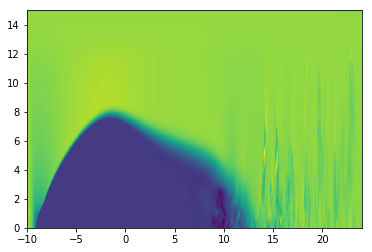

In [23]:
xedges = np.linspace(-10,24,k+1) 
yedges = np.linspace(0,15,i+1)
 
X,Y =np.meshgrid(xedges, yedges)
  
print('X=',X.shape)
print('Xend=',X[452,961])
print('Y=',Y.shape)
print('Yend=',Y[452,961])
 
data_slice = data[:,2,:]
 
print('data_slice=',data_slice.shape)
plt.pcolormesh(X,Y, data_slice)
plt.colorbar
plt.show()
